# Credit Card Fraud Detection using CNN

## Anonymized credit card transactions labeled as fraudelent or genuine

### It contains only numerical data which is a result of PCA transformation

### unbalanced dataset - ML agorithms overfits due to features with higher numbers

# Importing Modules

In [169]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [171]:
data = pd.read_csv(r"D:\Downloads\Videos\Krish\Datasets\Credit Card\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [172]:
data.shape

(284807, 31)

## Null Value Check

In [173]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [175]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Imbalance to balanced dataset

In [177]:
non_fraud = data[data['Class']==0]
fraud = data[data['Class']==1]

In [178]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [179]:
non_fraud = non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

## Merging data

In [180]:
data = fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,55850.0,-0.389776,1.080905,1.693269,0.931013,-0.715821,-0.366998,0.027457,-0.051774,0.013124,0.509924,-0.293721,-0.150074,0.232468,-0.083114,2.033271,-0.176550,0.034830,0.202774,1.381433,0.251510,0.018232,0.074949,0.056376,0.406153,-0.660062,0.369355,-0.064798,0.135137,6.47,0
980,116151.0,2.240946,-0.756951,-1.644156,-1.215672,-0.091067,-0.368837,-0.542354,-0.102029,-0.688720,1.056488,0.603213,-0.401408,-0.347958,0.297479,-0.190307,1.203458,-0.204430,-0.646437,0.832844,-0.046294,0.440280,1.230169,-0.021561,0.265009,0.224627,0.051656,-0.046425,-0.077353,1.00,0
981,69741.0,-0.443909,0.419384,1.365417,0.308822,0.779189,1.763115,0.049279,0.685183,-0.386871,-0.408228,1.813523,1.133768,-0.362093,0.249187,0.268451,-1.719555,1.224294,-1.873258,-0.253581,-0.111162,0.086180,0.531866,0.118569,-0.987636,-0.978630,0.349424,0.220148,0.148724,7.22,0
982,131276.0,-1.365932,1.514527,-0.099985,-0.618530,-0.053101,-1.108463,0.417753,0.484321,-0.542018,-0.873001,-1.246159,0.470174,0.356930,0.663931,-0.443947,0.068200,-0.079277,-0.660891,0.098654,-0.382397,-0.070741,-0.564977,0.039187,-0.015047,-0.384892,0.129566,-0.575644,0.002204,1.98,0


In [181]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

## getting target label

In [182]:
x = data.drop('Class', axis=1)
y = data['Class']

## Splitting Data

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [184]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

## Standardization

In [185]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # it avoids overfitting

In [186]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

### CNN during training takes 3 inputs

In [188]:
x_train.shape # we have 2D data now

(787, 30)

## Converting to 3D data

In [189]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [190]:
x_train.shape,  x_test.shape # we have 3D data now

((787, 30, 1), (197, 30, 1))

## Build CNN

In [192]:
epochs = 20
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2)) # randomly 20% neaurons will drop after second layer
 
model.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5)) # 50% neaurons will drop after second layer

# converting multi dim data to vector
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid')) # classification hence 1 used

In [193]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_18 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_17 (Batc (None, 29, 32)            128       
_________________________________________________________________
dropout_24 (Dropout)         (None, 29, 32)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 64)            256       
_________________________________________________________________
dropout_25 (Dropout)         (None, 28, 64)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1792)            

In [194]:
model.compile(optimizer=Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [195]:
# verbose shows proress of training
history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/20
25/25 [==============================] - 1s 24ms/step - loss: 0.8607 - accuracy: 0.6188 - val_loss: 0.6380 - val_accuracy: 0.7513
Epoch 2/20
25/25 [==============================] - 0s 11ms/step - loss: 0.4949 - accuracy: 0.8081 - val_loss: 0.5888 - val_accuracy: 0.7259
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.4136 - accuracy: 0.8526 - val_loss: 0.5461 - val_accuracy: 0.7665
Epoch 4/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3723 - accuracy: 0.8666 - val_loss: 0.5059 - val_accuracy: 0.8223
Epoch 5/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3192 - accuracy: 0.8755 - val_loss: 0.4609 - val_accuracy: 0.8579
Epoch 6/20
25/25 [==============================] - 0s 11ms/step - loss: 0.3074 - accuracy: 0.8945 - val_loss: 0.4178 - val_accuracy: 0.8629
Epoch 7/20
25/25 [==============================] - 0s 11ms/step - loss: 0.2976 - accuracy: 0.8996 - val_loss: 0.3807 - val_accuracy: 0.8934
Epoch 8/20
25

### training accuracy and validation accuracy differs = overfitting model our model

## Plotting learning curves

In [198]:
def plot_learningCurve(history, epoch):
    # plot training and validation accuaracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc = 'upper_left')
    plt.show()
    
    # plot training and validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc = 'upper_left')
    plt.show()

<ipython-input-198-4f23a172f1c9>:9: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train', 'Val'], loc = 'upper_left')


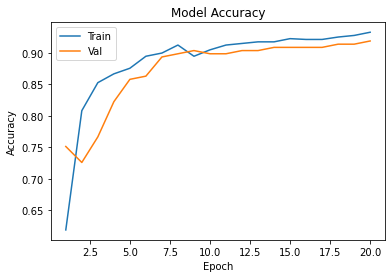

<ipython-input-198-4f23a172f1c9>:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train', 'Val'], loc = 'upper_left')


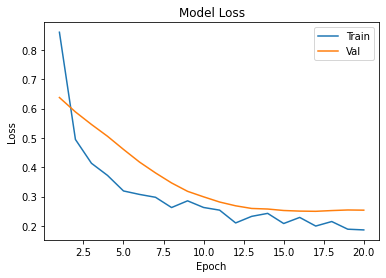

In [199]:
plot_learningCurve(history, epochs)

### validation loss is less than training loss
### from both curves our model is not more overfitting nor underfittting

## Addding maxpool to know how model getting accuracy

In [202]:
epochs = 20
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2)) # randomly 20% neaurons will drop after second layer
 
model.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5)) # 50% neaurons will drop after second layer

# converting multi dim data to vector
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid')) # classification hence 1 used

Epoch 1/20
25/25 [==============================] - 1s 25ms/step - loss: 1.2818 - accuracy: 0.4778 - val_loss: 0.6941 - val_accuracy: 0.5838
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.9683 - accuracy: 0.5718 - val_loss: 0.6560 - val_accuracy: 0.7817
Epoch 3/20
25/25 [==============================] - 0s 10ms/step - loss: 0.7230 - accuracy: 0.6582 - val_loss: 0.6217 - val_accuracy: 0.8376
Epoch 4/20
25/25 [==============================] - 0s 10ms/step - loss: 0.6419 - accuracy: 0.7014 - val_loss: 0.5898 - val_accuracy: 0.8376
Epoch 5/20
25/25 [==============================] - 0s 10ms/step - loss: 0.5984 - accuracy: 0.7357 - val_loss: 0.5590 - val_accuracy: 0.8325
Epoch 6/20
25/25 [==============================] - 0s 10ms/step - loss: 0.5485 - accuracy: 0.7560 - val_loss: 0.5289 - val_accuracy: 0.8376
Epoch 7/20
25/25 [==============================] - 0s 10ms/step - loss: 0.4827 - accuracy: 0.7929 - val_loss: 0.5012 - val_accuracy: 0.8477
Epoch 8/20
25

<ipython-input-198-4f23a172f1c9>:9: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train', 'Val'], loc = 'upper_left')


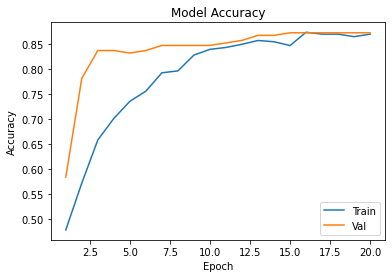

<ipython-input-198-4f23a172f1c9>:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train', 'Val'], loc = 'upper_left')


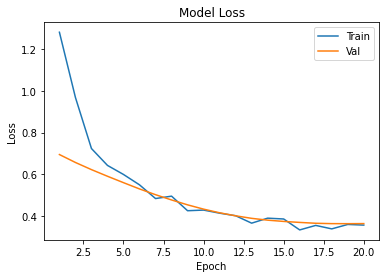

In [203]:
model.compile(optimizer=Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), verbose = 1)
plot_learningCurve(history, epochs)

### accuracy decreased so maxpool not helping to get more accuracy
### val accu > train accu so model is still learning
### so we are increasing epochs to see how it is increasig(accuracy)

Epoch 1/50
25/25 [==============================] - 1s 24ms/step - loss: 1.1374 - accuracy: 0.5159 - val_loss: 0.6755 - val_accuracy: 0.6294
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.9488 - accuracy: 0.6213 - val_loss: 0.6589 - val_accuracy: 0.6497
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.7733 - accuracy: 0.6595 - val_loss: 0.6356 - val_accuracy: 0.6447
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6874 - accuracy: 0.6950 - val_loss: 0.6105 - val_accuracy: 0.6497
Epoch 5/50
25/25 [==============================] - 0s 10ms/step - loss: 0.6542 - accuracy: 0.7217 - val_loss: 0.5863 - val_accuracy: 0.6599
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.5565 - accuracy: 0.7573 - val_loss: 0.5599 - val_accuracy: 0.6904
Epoch 7/50
25/25 [==============================] - 0s 10ms/step - loss: 0.5004 - accuracy: 0.7878 - val_loss: 0.5332 - val_accuracy: 0.7056
Epoch 8/50
25

<ipython-input-198-4f23a172f1c9>:9: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train', 'Val'], loc = 'upper_left')


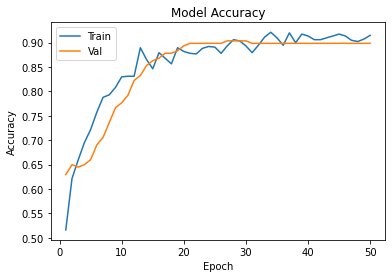

<ipython-input-198-4f23a172f1c9>:18: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['Train', 'Val'], loc = 'upper_left')


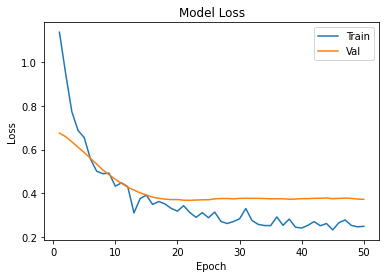

In [205]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2)) # randomly 20% neaurons will drop after second layer
 
model.add(Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5)) # 50% neaurons will drop after second layer

# converting multi dim data to vector
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid')) # classification hence 1 used

model.compile(optimizer=Adam(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_test, y_test), verbose = 1)

plot_learningCurve(history, epochs)

### after 20 epochs we reach to same accuracy saturation by adding pooling layer